# Task 4 :- To Explore Decision Tree Algorithm

#### PROBLEM STATEMENT :-
For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly. Data can be found at
https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing

To get started with data analysis and preprocessing we need to to import some python libraries.

In [37]:
# Loading the  Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [38]:
# Set the working directory
os.chdir('/home/abhishek/Downloads/')

In [39]:
# Load the iris dataset
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
df.shape

(150, 6)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [42]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [43]:
''''I drop 'id' column as it is useless.'''

df.drop(['Id'],inplace=True,axis=1)

###  Missing value analysis

In [44]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(df.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
#Rename variable
missing_per = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
#Calculate percentage
missing_per['Missing_percentage'] = (missing_per['Missing_percentage']/len(df))*100
#descending order
missing_per = missing_per.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_per

,Variables,Missing_percentage
0,SepalLengthCm,0.0
1,SepalWidthCm,0.0
2,PetalLengthCm,0.0
3,PetalWidthCm,0.0
4,Species,0.0


No missing values are present.

### Visualisation of data

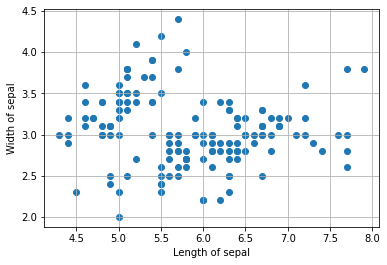

In [45]:
# Scatter plot with sepallength and sepalwidth
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.xlabel('Length of sepal')
plt.ylabel('Width of sepal')
plt.grid()
plt.show()

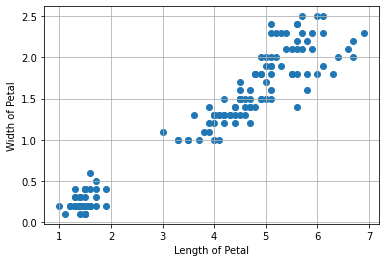

In [46]:
# Scatter plot with petallength and petalwidth
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'])
plt.xlabel('Length of Petal')
plt.ylabel('Width of Petal')
plt.grid()
plt.show()

### Correlation analysis

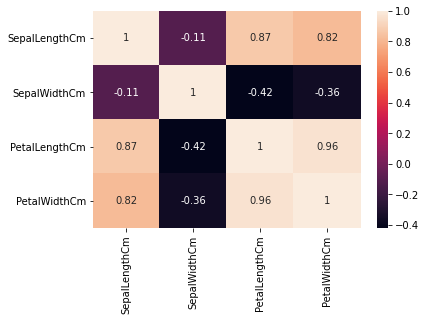

In [47]:
# Correlation heatmap
sns.heatmap(df.corr(),annot = True)

### Data preparation

In [48]:
# Creating array of the variables
X = df.iloc[:, 0:3].values # independent variable
y = df.iloc[:, -1].values  # Dependent variable

In [49]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
y = LE.fit_transform(y)

In [50]:
#Splitting the Dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### **Training The Model**

In [51]:
#Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 0)
classifier = classifier.fit(X_train, y_train)

In [52]:
y_pred= classifier.predict(X_test)
print("The Predection values are: ", y_pred)

The Predection values are:  [2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


### Evaluation of model

In [53]:
from sklearn.metrics import accuracy_score
print("The Accuracy of the model is: ", accuracy_score(y_test, y_pred))

The Accuracy of the model is:  0.9666666666666667


### Visualisation of Decision tree

Text(0.5, 1.0, 'Decision Tree')

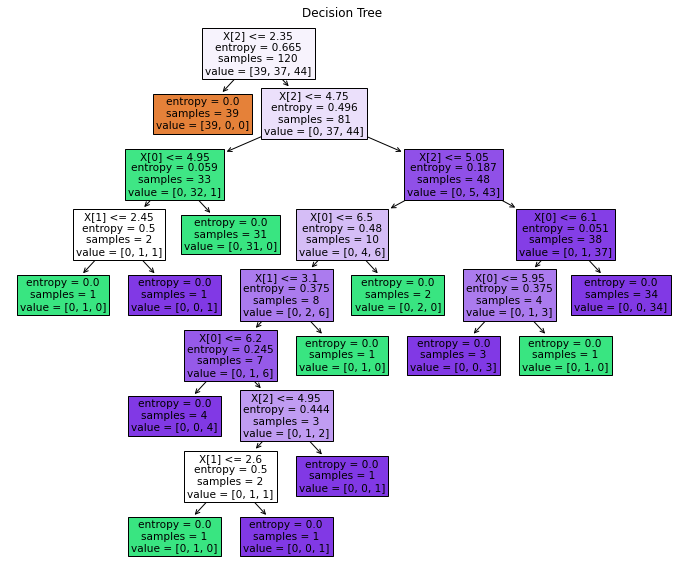

In [54]:
from sklearn import tree
plt.figure(figsize = (12,10))
tree.plot_tree(classifier , filled  =True)
plt.title("Decision Tree")